In [11]:
import numpy as np
import pandas as pd
from plotnine import *

plotly
https://plotly.com/python/ml-regression/

In [2]:
RLM_df = pd.DataFrame(data=[[1.087, 18.141, 37], [1.613, 42.404, 50], [0.953, 16.1, 34], [1.003, 13.605, 36], [1.156, 23.583, 43], [0.978, 7.71, 28], [1.092, 17.46, 37], [0.572, 3.855, 20], [0.940, 14.966, 34], [0.597, 4.308, 30], [0.838, 9.524, 38], [1.473, 35.828, 47]], columns=['Altura', 'Peso', 'Comprimento'])

In [3]:
df = RLM_df.copy()

In [4]:
df

,Altura,Peso,Comprimento
0,1.087,18.141,37
1,1.613,42.404,50
2,0.953,16.100,34
3,1.003,13.605,36
4,1.156,23.583,43
5,0.978,7.710,28
6,1.092,17.460,37
7,0.572,3.855,20
8,0.940,14.966,34
9,0.597,4.308,30


In [5]:
w0 = 10
w1 = 20
w2 = 15
alfa = 0.001
EQM = []

for epoca in range(1000):
    acc = 0
    erro = 0
    sumw0 = 0
    sumw1 = 0
    sumw2 = 0

    for i in range(len(df)):
        x_i_1 = df.iloc[i, 0]
        x_i_2 = df.iloc[i, 1]
        y_i = df.iloc[i, 2]

        erro = (y_i - w1 * x_i_1 - w2 * x_i_2 - w0)
        acc += erro * erro

        sumw0 += erro 
        sumw1 += erro * x_i_1
        sumw2 += erro * x_i_2

    w0 += (alfa * sumw0) / len(df)
    w1 += (alfa * sumw1) / len(df)
    w2 += (alfa * sumw2) / len(df)
    
    EQM.append(acc / len(df))

In [6]:
print(w0, w1, w2)

10.48996214694154 19.857325147415207 0.2564585807861777


In [13]:
EQM

[92667.38265833334,
 30256.911580774515,
 9887.041901371807,
 3238.6107947658506,
 1068.6569295585273,
 360.4126597354137,
 129.24906565185503,
 53.79764195229722,
 29.16839995648264,
 21.126778584435662,
 18.499116867885448,
 17.63849498250654,
 17.354611534891966,
 17.258969524760673,
 17.224769200678804,
 17.210624972873585,
 17.203029187028978,
 17.197573139990038,
 17.19281789343215,
 17.18829379691915,
 17.183847561433097,
 17.17942915370629,
 17.175022241642093,
 17.170621492715746,
 17.166225164503768,
 17.16183268634091,
 17.15744387000837,
 17.153058652113774,
 17.14867701000798,
 17.14429893434136,
 17.139924420106695,
 17.13555346371565,
 17.13118606204456,
 17.126822212123038,
 17.122461911032307,
 17.118105155872033,
 17.113751943749474,
 17.109402271775952,
 17.105056137065734,
 17.100713536735572,
 17.09637446790466,
 17.092038927694563,
 17.087706913229177,
 17.083378421634766,
 17.07905345003991,
 17.074731995575565,
 17.070414055375,
 17.066099626573827,
 17.06178870

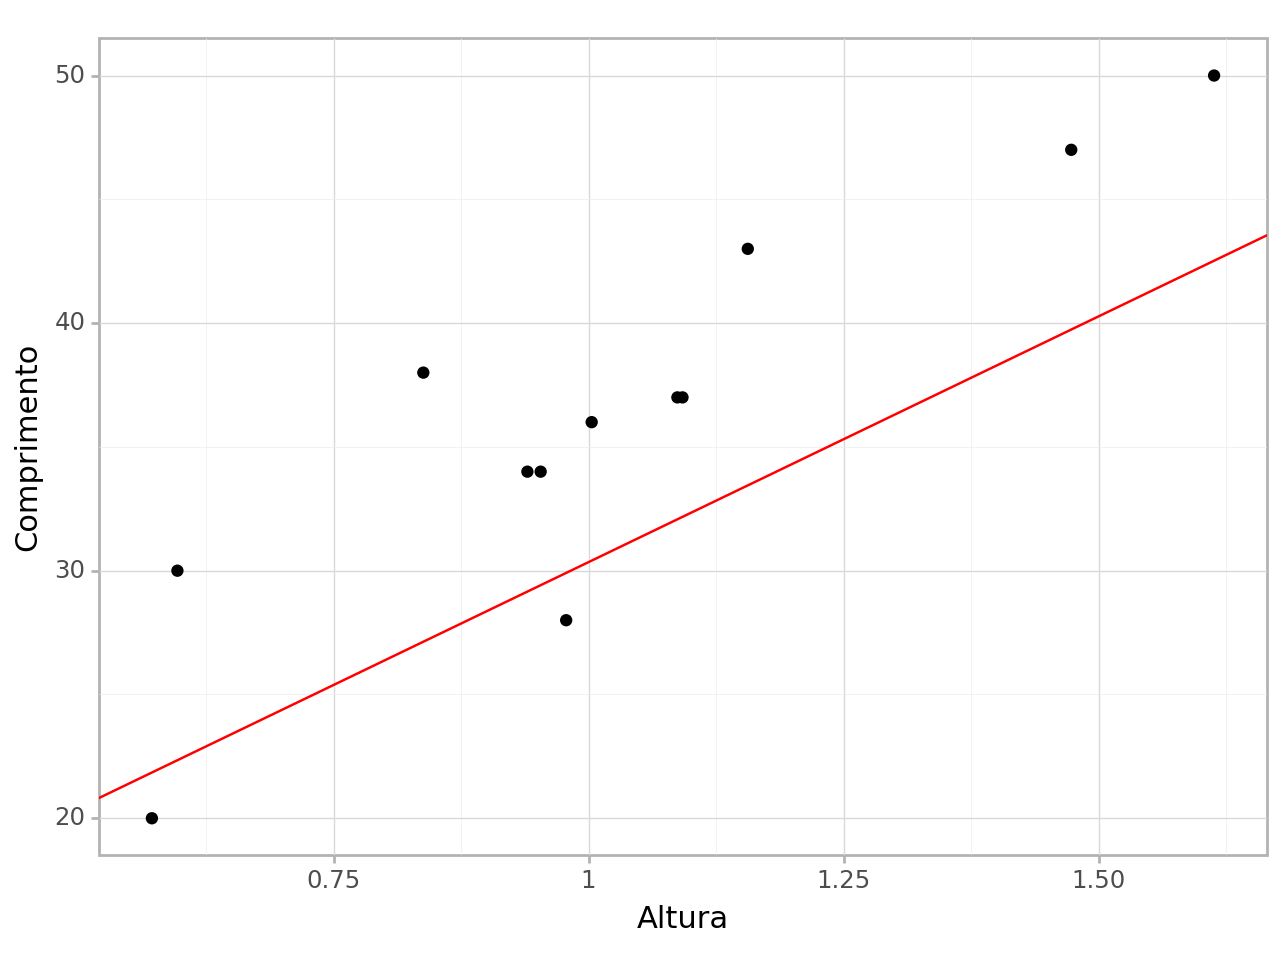

<Figure Size: (640 x 480)>

In [12]:
(ggplot(df, aes('Altura', 'Comprimento'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept = w0, slope = w1, color='red')
)

In [7]:
correlation = df.corr()

In [8]:
import seaborn as sn


<Axes: >

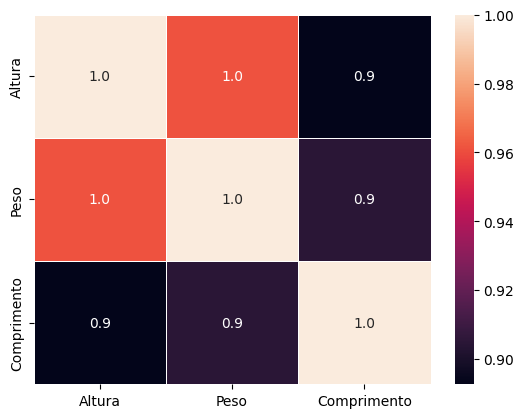

In [9]:
plot = sn.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6)
plot

In [20]:
def predict(w0, w1, w2, x1, x2):
    y = w1*x1 + w2*x2 + w0
    return y

In [15]:
df

,Altura,Peso,Comprimento
0,1.087,18.141,37
1,1.613,42.404,50
2,0.953,16.100,34
3,1.003,13.605,36
4,1.156,23.583,43
5,0.978,7.710,28
6,1.092,17.460,37
7,0.572,3.855,20
8,0.940,14.966,34
9,0.597,4.308,30


In [21]:
predict(w0, w1, w2, 1.087, 18.141)

36.72728969622392

In [23]:
predict(w0, w1, w2, 0.953, 16.100)

33.5429761630857

In [22]:
predict(w0, w1, w2, 1.613, 42.404)

53.39469726937935